<a href="https://colab.research.google.com/github/pgoodboy/goldPredix/blob/master/GoldPredictor_Pejoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import os
from sklearn import preprocessing
from matplotlib import pyplot as plt
from matplotlib import style
from google.colab import drive
drive.mount('/content/drive/')
dataGold = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/gold.csv', parse_dates=['Date'], index_col='Date')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
print(dataGold.columns)

Index(['Gold'], dtype='object')


In [0]:
#dataUSD = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Data/USDBHD.csv',parse_dates=['Date'], index_col='Date')

In [0]:
#print(dataUSD.columns)

In [0]:
dataDJIA = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Data/DJIA.csv',parse_dates=['Date'], index_col='Date')
dataGas = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Data/Gas.csv',parse_dates=['Date'], index_col='Date')

In [0]:
print(dataGas.columns)

Index(['RegAll', 'RegConvention'], dtype='object')


In [0]:
#merge = pd.merge(dataGold,dataUSD,on = 'Date',how = 'outer')
merge = pd.merge(dataGold, dataDJIA,on = 'Date', how = 'outer')
merge = pd.merge(merge, dataGas,on = 'Date', how = 'outer')

In [0]:
print(merge.columns)

Index(['Gold', 'DJIAOpen', 'DJIAHigh', 'DJIALow', 'DJIAClose', 'RegAll',
       'RegConvention'],
      dtype='object')


In [0]:
scaler = preprocessing.StandardScaler()
scaled_Data = scaler.fit_transform(merge)
scaled_Data = pd.DataFrame(scaled_Data, columns = ['Gold','DJIAOpen', 'DJIAHigh', 'DJIALow', 'DJIAClose','RegAll','RegConvention'])

In [0]:
merge.sort_values(by=['Date'],axis=0,ascending=True,inplace=True)

In [0]:
NaNUsdBhd = merge[merge['RegAll'].isna()]
NaNDJIA = merge[merge['DJIAHigh'].isna()]
discard = pd.merge(NaNUsdBhd,NaNDJIA,on = 'Date',how = 'inner')

In [0]:
merge.drop(discard.index, inplace=True)

In [0]:
merge[['RegAll', 'RegConvention']] = merge[['RegAll', 'RegConvention']].fillna(method='ffill')
merge[['RegAll', 'RegConvention']] = merge[['RegAll', 'RegConvention']].fillna(method='bfill')
merge[['Gold']] = merge[['Gold']].interpolate(method = 'time')
#merge[['USD-BHD']] = merge[['USD-BHD']].interpolate(method = 'time')
merge[['DJIAOpen']] = merge[['DJIAOpen']].interpolate(method = 'time')
merge[['DJIAHigh']] = merge[['DJIAHigh']].interpolate(method = 'time')
merge[['DJIALow']] = merge[['DJIALow']].interpolate(method = 'time')
merge[['DJIAClose']] = merge[['DJIAClose']].interpolate(method = 'time')

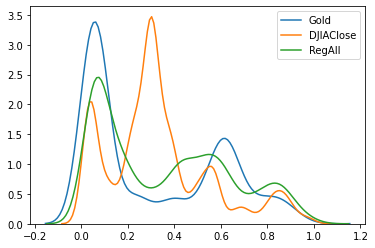

,Gold,DJIAOpen,DJIAHigh,DJIALow,DJIAClose,RegAll,RegConvention
Gold,1.000000,0.712841,0.711023,0.714707,0.713073,0.841559,0.833623
DJIAOpen,0.712841,1.000000,0.999899,0.999868,0.999820,0.600034,0.581920
DJIAHigh,0.711023,0.999899,1.000000,0.999778,0.999882,0.599423,0.581312
DJIALow,0.714707,0.999868,0.999778,1.000000,0.999891,0.600920,0.582814
DJIAClose,0.713073,0.999820,0.999882,0.999891,1.000000,0.600135,0.582020
RegAll,0.841559,0.600034,0.599423,0.600920,0.600135,1.000000,0.999560
RegConvention,0.833623,0.581920,0.581312,0.582814,0.582020,0.999560,1.000000


In [0]:
import seaborn as sns
scaler = preprocessing.MinMaxScaler()
scaled_Data = scaler.fit_transform(merge)
scaled_Data = pd.DataFrame(scaled_Data, columns = ['Gold','DJIAOpen', 'DJIAHigh', 'DJIALow', 'DJIAClose','RegAll','RegConvention'])
y = scaled_Data.iloc[10:,0]
X = scaled_Data.iloc[:-10,:]
sns.kdeplot(y)
#sns.kdeplot(scaled_Data['USD-BHD'])
#sns.kdeplot(scaled_Data['DJIAOpen'])
#sns.kdeplot(scaled_Data['DJIAHigh'])
#sns.kdeplot(scaled_Data['DJIALow'])
sns.kdeplot(X['DJIAClose'])
sns.kdeplot(X['RegAll'])
#sns.kdeplot(scaled_Data['RegConvention'])
plt.show()
scaled_Data
scaled_Data.corr(method = 'pearson')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
linearM = LinearRegression()
lassoM = LassoCV(eps = 0.005)
svrPolyM = SVR(kernel='poly')
gradientM = GradientBoostingRegressor()
kfold = model_selection.KFold(n_splits=10, random_state = 420, shuffle=True)
linearScore = model_selection.cross_val_score(linearM, X_train, y_train, cv = kfold)
lassoScore = model_selection.cross_val_score(lassoM, X_train, y_train, cv = kfold)
svrPolyScore = model_selection.cross_val_score(svrPolyM, X_train, y_train, cv = kfold)
gradientScore = model_selection.cross_val_score(gradientM, X_train, y_train, cv = kfold)


In [0]:
print("----------Score----------")
print("Linear Regression : Avg.",linearScore.mean(), "S.D.",linearScore.std())
print("Lasso Regression : Avg.",lassoScore.mean(),"S.D.", lassoScore.std())
print("SVR Polynomial Regression : Avg.",svrPolyScore.mean(),"S.D.", svrPolyScore.std())
print("Gradient Boosting Regression : Avg.",gradientScore.mean(),"S.D.", gradientScore.std())

----------Score----------
Linear Regression : Avg. 0.9962509880834034 S.D. 0.00044675533341935713
Lasso Regression : Avg. 0.9962361754997306 S.D. 0.0004298343175551036
SVR Polynomial Regression : Avg. 0.9095202302464737 S.D. 0.004365161831200933
Gradient Boosting Regression : Avg. 0.9970998490087013 S.D. 0.00036904701561825664


In [0]:
linearM.fit(X_train, y_train)
lassoM.fit(X_train, y_train)
svrPolyM.fit(X_train, y_train)
gradientM.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
linearTest = linearM.predict(X_test)
lassoTest = lassoM.predict(X_test)
svrPolyTest = svrPolyM.predict(X_test)
gradientTest = gradientM.predict(X_test)

In [0]:
from sklearn import metrics
print('Linear Regression')
print("RMSE : ",metrics.mean_squared_error(y_test, linearTest))
print("R^2 Score : ",metrics.r2_score(y_test, linearTest))
print('Lasso Regression')
print("RMSE : ",metrics.mean_squared_error(y_test, lassoTest))
print("R^2 Score : ",metrics.r2_score(y_test, lassoTest))
print('SVR Polynomial Regression')
print("RMSE : ",metrics.mean_squared_error(y_test, svrPolyTest))
print("R^2 Score : ",metrics.r2_score(y_test, svrPolyTest))
print('Gradient Boosting Regression')
print("RMSE : ",metrics.mean_squared_error(y_test, gradientTest))
print("R^2 Score : ",metrics.r2_score(y_test, gradientTest))

Linear Regression
RMSE :  0.00031723624629553126
R^2 Score :  0.9960545654917381
Lasso Regression
RMSE :  0.00031770083691844744
R^2 Score :  0.9960487874260308
SVR Polynomial Regression
RMSE :  0.007533065768980833
R^2 Score :  0.9063120372119915
Gradient Boosting Regression
RMSE :  0.0002537869289575186
R^2 Score :  0.9968436781138748


In [0]:
from sklearn.model_selection import GridSearchCV
learnRate = [0.000001,0.0001,0.001, 0.1]
nEstimate = [1, 10 ,100, 1000]
subSamp = [0.00001,0.01, 0.1]
mxDepth = [1,3,5,10,20]
gridParam = [{'learning_rate' : learnRate, 
               'n_estimators' : nEstimate,
               'subsample' : subSamp, 
               'max_depth' : mxDepth},
              ]
grid = model_selection.GridSearchCV(GradientBoostingRegressor(), gridParam, cv = kfold)
grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=420, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_wei...
                                                 presort='deprecated',
                                          

In [0]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.1}

In [0]:
grid.best_score_

0.9985948353621984

In [0]:
gridPred = grid.predict(X_test)

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true,y_pred = y_true.tolist(),y_pred.tolist()
    sum = 0
    ctn = 0
    mx = 0
    for i in range(len(y_true)) :
      if y_true[i] != 0 :
        #if abs((y_true[i] - y_pred[i]) / y_true[i])*100 > 20:
          #mx = abs((y_true[i] - y_pred[i]) / y_true[i])
          #print(y_true[i] , y_pred[i])
          #print(abs((y_true[i] - y_pred[i]) / y_true[i])*100)
        sum += abs((y_true[i] - y_pred[i]) / y_true[i])
      else :
        ctn =+ 1
    #print(mx)
    return sum/(len(y_true)-ctn) * 100

print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, gridPred)))
print('MAPE : ',mean_absolute_percentage_error(y_test, gridPred))
print('R^2 Score : ',metrics.r2_score(y_test, gridPred))


RMSE :  0.010903866876848575
MAPE :  9.24558339675175
R^2 Score :  0.9985213236813153


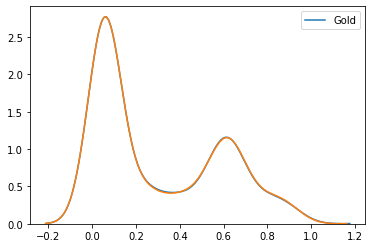

In [0]:
sns.kdeplot(y_test)
sns.kdeplot(gridPred)
plt.show()

In [0]:
ctn = 0
for i in np.nditer(y_test) :
  i=float(i)
  if  i == 0:
    ctn+=1
print(ctn)

0


In [0]:
tlst = gridPred.tolist()